# Homework 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import legendre
import copy

In [2]:
def f(Z):
    # Function to be considered where Z in U[-1, 1]
    return np.sin(2 * (Z - 1)**2)

Build a gPC approximation of f(Z) using orthogonal polynominals. Truncate after the 7th degree poly. Plot the true f(Z) and its approximation

First, the Legendre polynominal is the correct one. See: https://colab.research.google.com/github/ndcbe/cbe67701-uncertainty-quantification/blob/master/docs/09.02-Uniform-Random-Variables-Legendre-Polynomials-Example.ipynb

In [3]:
# True function of f
X = np.linspace(-1, 1, 100)
Y = np.array(list(map(f, X)))

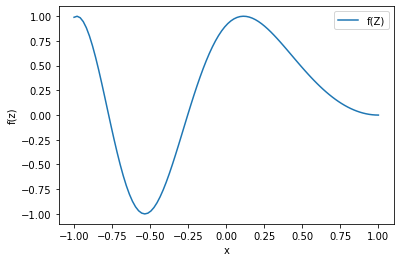

In [6]:
plt.plot(X, Y, label = 'f(Z)')
plt.legend()
plt.ylabel('f(z)')
plt.xlabel('x')
plt.show()

Recall that gCP is $$f(Z) \approx f_N(Z) = \sum^{N}_{n=0} \hat{f_n}\psi_{n}(Z)$$

where $\hat{f_n},$
is approximated by quadrature and $\psi_{n}$ is approximated by orthognal poly

In [46]:
N = 7 # Degree poly
x, w = np.polynomial.legendre.leggauss(N) # Weights and ponts of Gauss-Legendre

In [47]:
fx = np.array(list(map(f, x))) # function evaluated at Gauss-Legendre

In [52]:
# Inner product
c = np.zeros(N)
g = np.zeros(N)

for i in range(1, N + 1):
    px = legendre(i - 1)(x)
    c[i - 1] = sum(px * fx * w)
    g[i - 1] = sum(px * px * w)

In [53]:
# Generate poly for all values of x at each degree
poly = []
for i in range(1, N + 1):
    poly.append(legendre(i - 1)(X))

In [54]:
fa = np.zeros(len(X))

for i in range(1, len(c)):
    fa += (c[i]/g[i]) * poly[i]

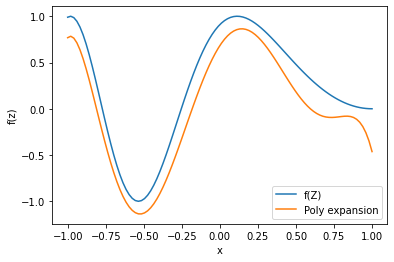

In [55]:
plt.plot(X, Y, label = 'f(Z)')
plt.plot(X, fa, label = 'Poly expansion')
plt.legend()
plt.ylabel('f(z)')
plt.xlabel('x')
plt.show()

Compute the mean and varianceo of f(Z) using MC sampling. Compute mean and variance of the approximation $f_{N=7}(Z)$ from the expansion coefficient. Plot the distributions by generating many samples

In [34]:
random_sample = np.random.uniform(-1, 1, 1000000)
monte_carlo_f = np.array(list(map(f, random_sample)))

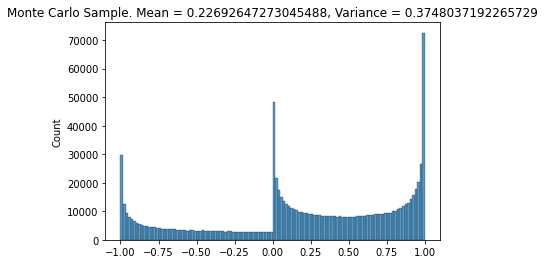

In [35]:
sns.histplot(monte_carlo_f)
plt.title(f'Monte Carlo Sample. Mean = {np.mean(monte_carlo_f)}, Variance = {np.var(monte_carlo_f)}')
plt.show()

In [64]:
# Mean through expansion coefficient
c[0]/g[0]

0.2269036762656133

In [65]:
# Variance through expansion coefficient